In [6]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt


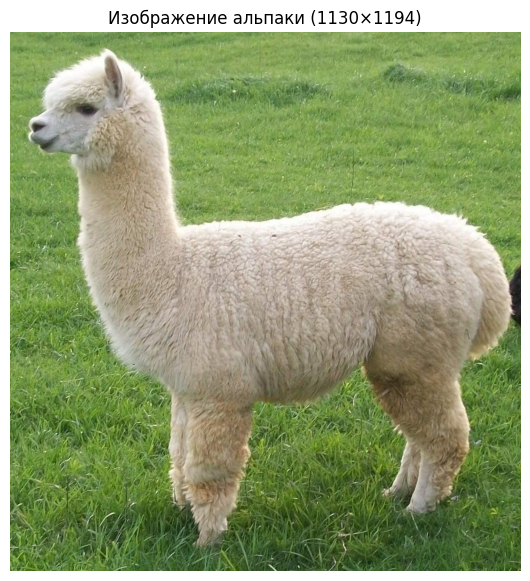

Размер массива: (1194, 1130, 3), диапазон значений: 0.0–255.0


In [7]:
name = "альпака.jpg"
img = Image.open(name)
img_array = np.array(img, dtype=np.float32)

plt.figure(figsize=(10,7))
plt.imshow(img)
plt.title(f"Изображение альпаки ({img.width}×{img.height})")
plt.axis('off')
plt.show()

print(f"Размер массива: {img_array.shape}, диапазон значений: {img_array.min():.1f}–{img_array.max():.1f}")


In [8]:
U_R, S_R, Vt_R = np.linalg.svd(img_array[:, :, 0], full_matrices=False)
U_G, S_G, Vt_G = np.linalg.svd(img_array[:, :, 1], full_matrices=False)
U_B, S_B, Vt_B = np.linalg.svd(img_array[:, :, 2], full_matrices=False)

print(f"U: {U_R.shape}, S: {S_R.shape}, Vt: {Vt_R.shape}, сингулярных значений: {len(S_R)}")


U: (1194, 1130), S: (1130,), Vt: (1130, 1130), сингулярных значений: 1130


In [9]:
def reconstruct_image(U, S, Vt, k):
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]
    rec = U_k @ S_k @ Vt_k
    rec = np.clip(rec, 0, 255)
    return rec.astype(np.uint8)


In [10]:
m, n = img_array.shape[:2]
max_k = min(m, n)
k_values = [1, 2, 10, 30, 100, max_k]

results = {}

for k in k_values:
    reconstructed = np.stack([
        reconstruct_image(U_R, S_R, Vt_R, k),
        reconstruct_image(U_G, S_G, Vt_G, k),
        reconstruct_image(U_B, S_B, Vt_B, k)
    ], axis=2)

    compressed_elements = 3 * (m * k + k + k * n)
    compression_ratio = (3*m*n)/compressed_elements if k!=max_k else 1.0
    mse = 0 if k==max_k else np.mean(((img_array/255)-(reconstructed/255))**2)

    results[k] = (reconstructed, compression_ratio, mse)


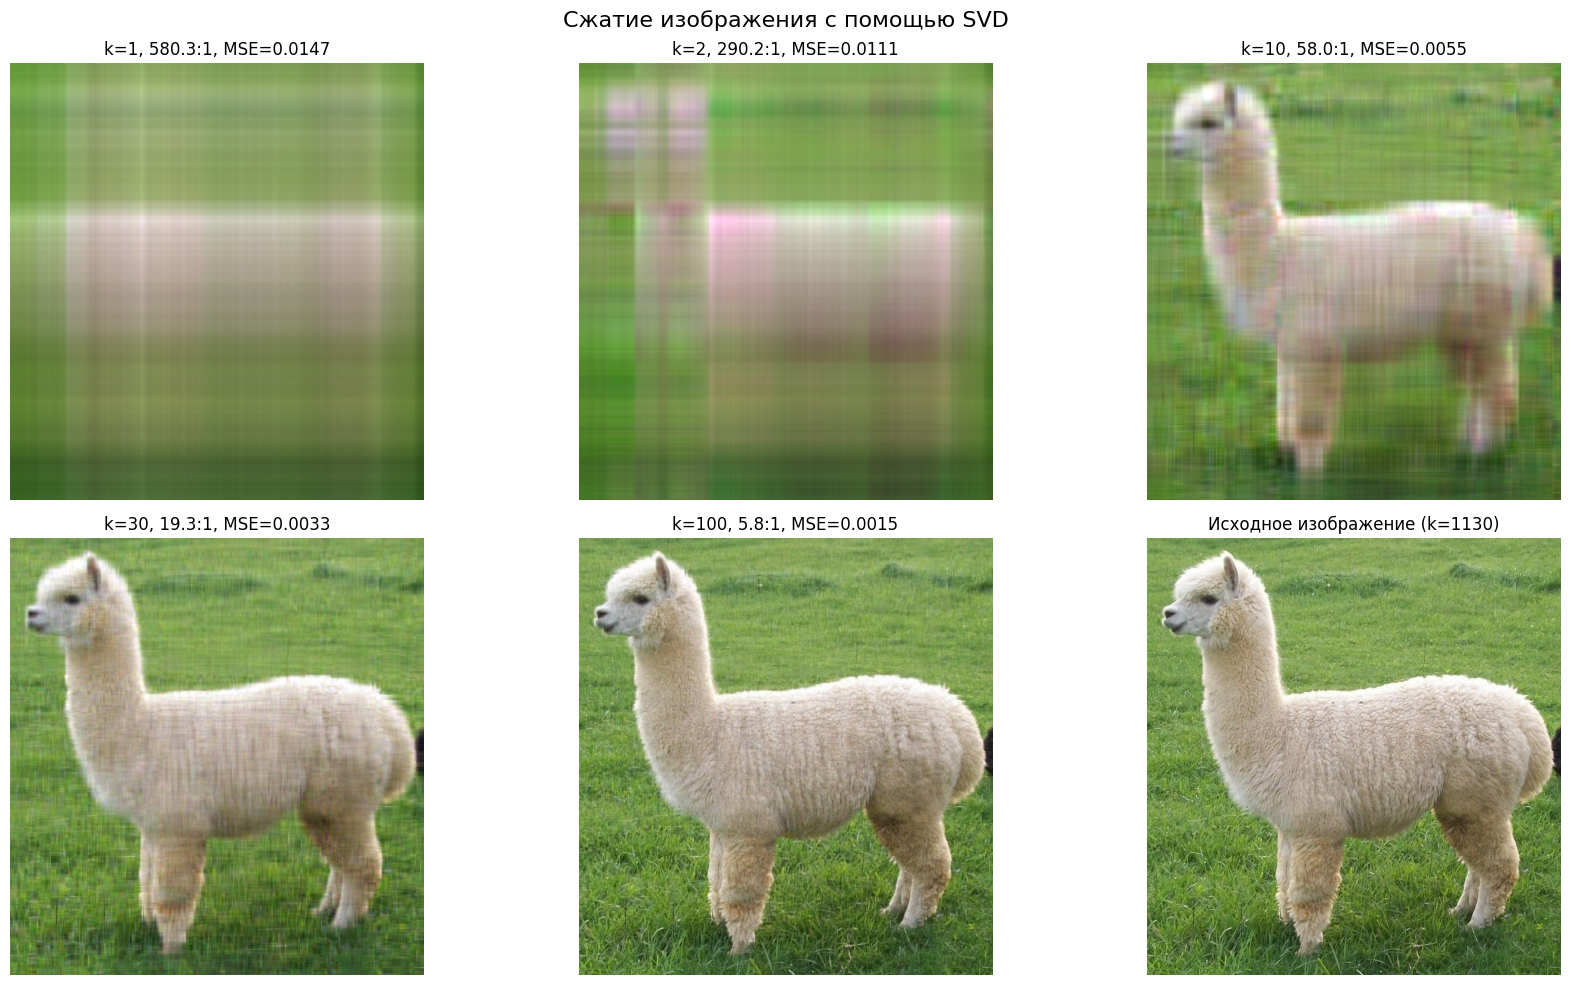

In [11]:
plt.figure(figsize=(18,10))

for i,k in enumerate(k_values):
    img_rec, ratio, mse = results[k]
    plt.subplot(2,3,i+1)
    plt.imshow(img_rec)
    plt.axis('off')
    if k==max_k:
        plt.title(f"Исходное изображение (k={k})")
    else:
        plt.title(f"k={k}, {ratio:.1f}:1, MSE={mse:.4f}")

plt.suptitle("Сжатие изображения с помощью SVD", fontsize=16)
plt.tight_layout()
plt.show()
